# Importing base modules and adjustments

In [12]:
import requests
import pandas as pd
import time

base_url = 'https://www.cheapshark.com/api/1.0/deals'
params = {'pageSize': 60}
all_data = []

page_num = 1
while True:
    params['pageNumber'] = page_num
    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        all_data.extend(data)

        if len(data) < params['pageSize']:
            break
    elif response.status_code == 429:
        print("Rate limited! Waiting for 5 seconds...")
        time.sleep(5)  # Wait for 5 seconds before retrying
        continue  # Retry the current page
    else:
        print(f"Error on page {page_num}: Status code {response.status_code}")
        break

    page_num += 1
    time.sleep(1)  # Wait 1 second between pages (optional but recommended)

df = pd.DataFrame(all_data)
df.info()

Error on page 51: Status code 400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   internalName        3000 non-null   object
 1   title               3000 non-null   object
 2   metacriticLink      2793 non-null   object
 3   dealID              3000 non-null   object
 4   storeID             3000 non-null   object
 5   gameID              3000 non-null   object
 6   salePrice           3000 non-null   object
 7   normalPrice         3000 non-null   object
 8   isOnSale            3000 non-null   object
 9   savings             3000 non-null   object
 10  metacriticScore     3000 non-null   object
 11  steamRatingText     2707 non-null   object
 12  steamRatingPercent  3000 non-null   object
 13  steamRatingCount    3000 non-null   object
 14  steamAppID          2654 non-null   object
 15  releaseDate         3000 non-null   in

In [78]:
df.head()

,internalName,title,metacriticLink,dealID,storeID,gameID,salePrice,normalPrice,isOnSale,savings,metacriticScore,steamRatingText,steamRatingPercent,steamRatingCount,steamAppID,releaseDate,lastChange,dealRating,thumb
0,THEWITCHER2ASSASSINSOFKINGSENHANCEDEDITION,The Witcher 2: Assassins of Kings Enhanced Edi...,/game/pc/the-witcher-2-assassins-of-kings,VRDjsza%2B9C1gxiDKbQl2jV%2FNDXq1swXPTrcQRJlPy6...,11,5572,2.99,19.99,1,85.042521,88,Very Positive,89,74223,20920,1305590400,1728594236,9.3,https://shared.akamai.steamstatic.com/store_it...
1,TOMBRAIDERLEGEND,Tomb Raider: Legend,/game/tomb-raider-legend/,OHLVPRtKe0yhmLiXs20UlU1Wr1C1JD8IIPQLnBeqG%2FE%3D,3,502,0.82,6.99,1,88.268956,82,Very Positive,87,4445,7000,1144713600,1728638085,9.3,https://shared.akamai.steamstatic.com/store_it...
2,TOMBRAIDERANNIVERSARY,Tomb Raider: Anniversary,/game/tomb-raider-anniversary/,x1tWXn4JqhymGpDor5yB1eZIgyS2ZACkeRcD5unj4Zk%3D,3,456,1.13,8.99,1,87.430478,83,Very Positive,81,5682,8000,1181001600,1728638044,9.3,https://shared.akamai.steamstatic.com/store_it...
3,DESTINY2THEWITCHQUEEN,Destiny 2: The Witch Queen,/game/destiny-2-the-witch-queen/,GJOa5aX01KzJQoM4DAsgo414y8%2F%2BcN9QjPriM4OzNH...,34,233788,4.20,29.99,1,85.995332,86,None,0,0,None,1645488000,1728623528,9.3,https://sttc.gamersgate.com/images/product/des...
4,TOMBRAIDERANNIVERSARY,Tomb Raider: Anniversary,/game/tomb-raider-anniversary/,ryaV37fbWkAIG6ZLy%2FtViuEGOIShgUVV7kpgbYlDqQk%3D,1,456,0.98,8.99,1,89.098999,83,Very Positive,81,5682,8000,1181001600,1728581830,9.3,https://shared.akamai.steamstatic.com/store_it...


# **Hypothesis 1:**
Cheaper games are higher rated compared to more expensive games.

**Research Question:**
How does game pricing correlate with user ratings?

Correlation between normalPrice and steamRatingPercent: -0.02407462103383702


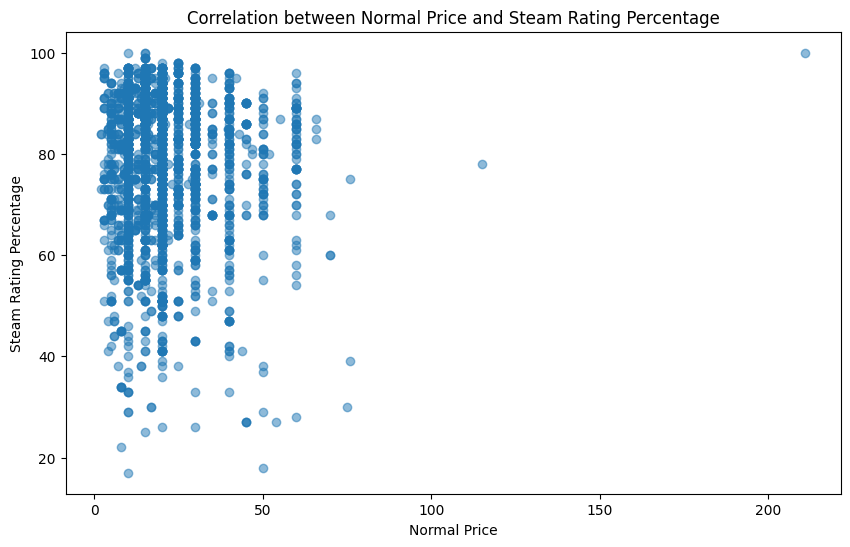

In [61]:
import matplotlib.pyplot as plt

df['normalPrice'] = pd.to_numeric(df['normalPrice'])
df['steamRatingPercent'] = pd.to_numeric(df['steamRatingPercent'])
new_df = df[df['steamRatingPercent'] != 0]

correlation = new_df['normalPrice'].corr(new_df['steamRatingPercent'])
print(f"Correlation between normalPrice and steamRatingPercent: {correlation}")

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(new_df['normalPrice'], new_df['steamRatingPercent'], alpha=0.5)  # Create scatterplot
plt.title('Correlation between Normal Price and Steam Rating Percentage')
plt.xlabel('Normal Price')
plt.ylabel('Steam Rating Percentage')
plt.grid(False)
plt.show()

Correlation between normalPrice and metacriticScore: 0.13243843644950043


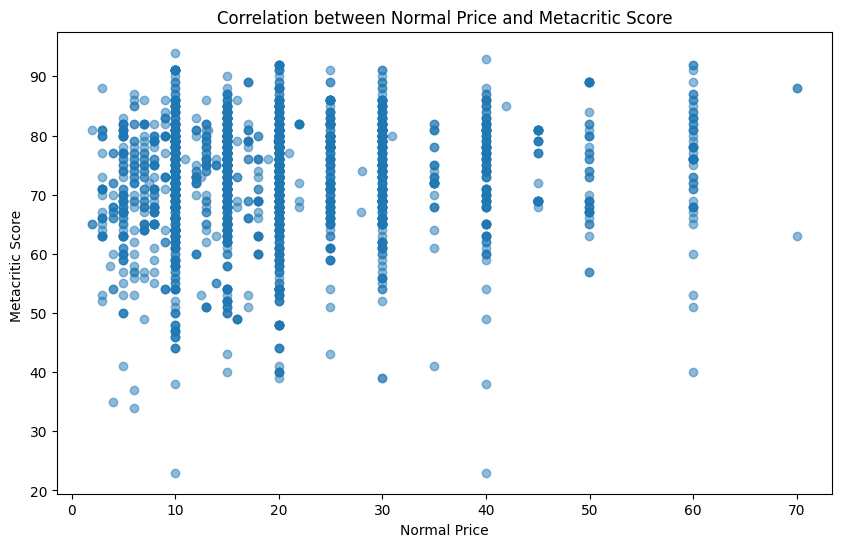

In [65]:
import matplotlib.pyplot as plt

df['normalPrice'] = pd.to_numeric(df['normalPrice'])
df['metacriticScore'] = pd.to_numeric(df['metacriticScore'])
new_df = df[df['metacriticScore'] != 0]

correlation = new_df['normalPrice'].corr(new_df['metacriticScore'])
print(f"Correlation between normalPrice and metacriticScore: {correlation}")

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(new_df['normalPrice'], new_df['metacriticScore'], alpha=0.5)  # Create scatterplot
plt.title('Correlation between Normal Price and Metacritic Score')
plt.xlabel('Normal Price')
plt.ylabel('Metacritic Score ')
plt.grid(False)
plt.show()

In [91]:
from scipy import stats

price_threshold = new_df['normalPrice'].median()
print(f"Price Threshold (Median): {price_threshold}")

# Assuming 'price_threshold' is your defined price cutoff
cheaper_games = new_df[new_df['normalPrice'] <= price_threshold]['steamRatingPercent']
expensive_games = new_df[new_df['normalPrice'] > price_threshold]['steamRatingPercent']

t_statistic, p_value = stats.ttest_ind(cheaper_games, expensive_games)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

Price Threshold (Median): 19.99
T-statistic: -0.29764614897349906, P-value: 0.7659976091701517


**Findings:**

The analysis of the hypothesis that cheaper games are rated higher than more expensive ones yielded a correlation coefficient of approximately -0.024, indicating a negligible negative correlation between normal price and Steam rating percentage. This suggests that there is virtually no linear relationship between the two variables. The price threshold, set at the median value of $19.99, further contextualizes the data. The t-statistic of -0.298 and a p-value of 0.766 imply that the difference in ratings between games priced below and above the median is not statistically significant. The scatter plot visually reinforces these findings, showing a scattered distribution of data points without a clear trend. Overall, these results imply that, contrary to the hypothesis, price does not significantly influence game ratings on Steam.


# **Hypothesis 2:**
The longer a game is on the market, the lower the review percentage.

**Research Question:**
How does the age of a game impact the user reviews?


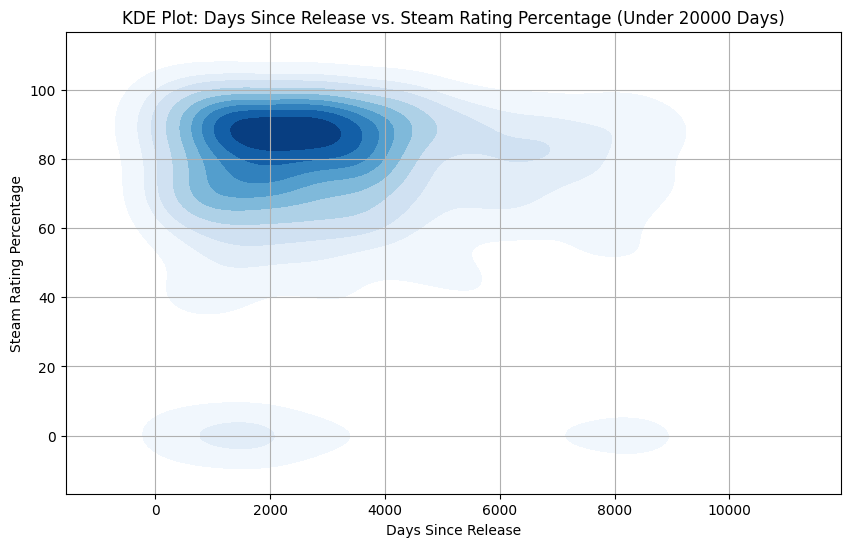

In [96]:
from datetime import datetime
import seaborn as sns

new_df.loc[:, 'releaseDate'] = pd.to_datetime(new_df['releaseDate'], unit='s')

new_df.loc[:, 'daysSinceRelease'] = (datetime.now() - new_df['releaseDate']).dt.days
correlation = new_df['daysSinceRelease'].corr(new_df['steamRatingPercent'])

# Filter data for daysSinceRelease under 20000
filtered_df = new_df[new_df['daysSinceRelease'] < 20000]

# KDE plot with filtered data
plt.figure(figsize=(10, 6))
sns.kdeplot(x=filtered_df['daysSinceRelease'], y=filtered_df['steamRatingPercent'], fill=True, cmap='Blues')
plt.title('KDE Plot: Days Since Release vs. Steam Rating Percentage (Under 20000 Days)')
plt.xlabel('Days Since Release')
plt.ylabel('Steam Rating Percentage')
plt.grid(True)
plt.show()

In [98]:
correlation, p_value = stats.pearsonr(new_df['daysSinceRelease'], new_df['steamRatingPercent'])
print(f"Correlation: {correlation}, P-value: {p_value}")

Correlation: -0.04766811409731538, P-value: 0.016279850897666877


Correlation between Days since release and Steam Rating Count: -0.01761921047974443


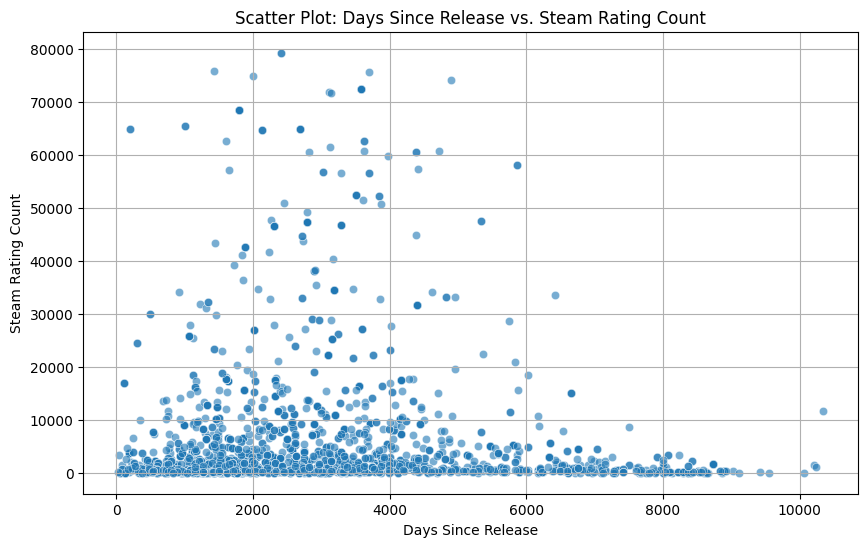

In [88]:
# Calculating correlation
correlation = new_df['daysSinceRelease'].corr(new_df['steamRatingCount'])
print(f"Correlation between Days since release and Steam Rating Count: {correlation}")

# Filtering data for daysSinceRelease and steamRatingCount
filtered_df = new_df[(new_df['daysSinceRelease'] < 20000) & (new_df['steamRatingCount'] < 80000)]

# Delete NaN
filtered_df = filtered_df.dropna(subset=['daysSinceRelease', 'steamRatingCount'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='daysSinceRelease', y='steamRatingCount', alpha=0.6)
plt.title('Scatter Plot: Days Since Release vs. Steam Rating Count')
plt.xlabel('Days Since Release')
plt.ylabel('Steam Rating Count')
plt.grid(True)
plt.show()

**Findings:**

The examination of the hypothesis that the longer a game is on the market, the lower the review percentage produced a correlation coefficient of approximately -0.048. This indicates a slight negative correlation between the number of days since release and Steam rating percentage. Additionally, the p-value of 0.016 suggests that this correlation is statistically significant, implying that there may be a weak tendency for older games to have lower review percentages. The KDE plot of the filtered dataset (games with less than 20,000 days since release) further illustrates this relationship, showing the distribution of review percentages across varying release durations. Overall, while the correlation is weak, it supports the notion that games released longer tend to receive slightly lower ratings.

# **Hypothesis 3:**
Certain stores consistently offer lower prices for games compared to others.

**Research Question:**
Is there a significant difference between prices at different stores?

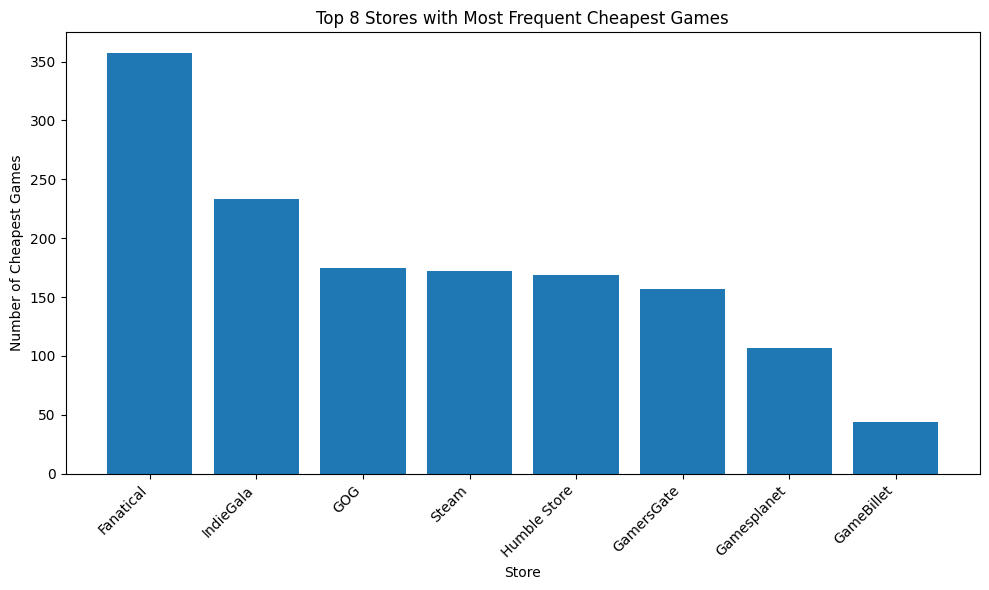

In [56]:
# Get store names from CheapShark API
response = requests.get("https://www.cheapshark.com/api/1.0/stores")
stores_data = response.json()
store_names = {store['storeID']: store['storeName'] for store in stores_data}

# Find the cheapest salePrice for each game and corresponding storeID
cheapest_stores = new_df.loc[new_df.groupby('gameID')['salePrice'].idxmin()]

# Get the top 8 most frequent storeIDs
top_8_stores = cheapest_stores['storeID'].value_counts().nlargest(8)

# Rename storeIDs
top_8_stores.index = top_8_stores.index.map(store_names)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_8_stores.index, top_8_stores.values)
plt.title('Top 8 Stores with Most Frequent Cheapest Games')
plt.xlabel('Store')
plt.ylabel('Number of Cheapest Games')
plt.xticks(rotation=45, ha='right')  # slightly rotate x-axis labels
plt.tight_layout()
plt.show()

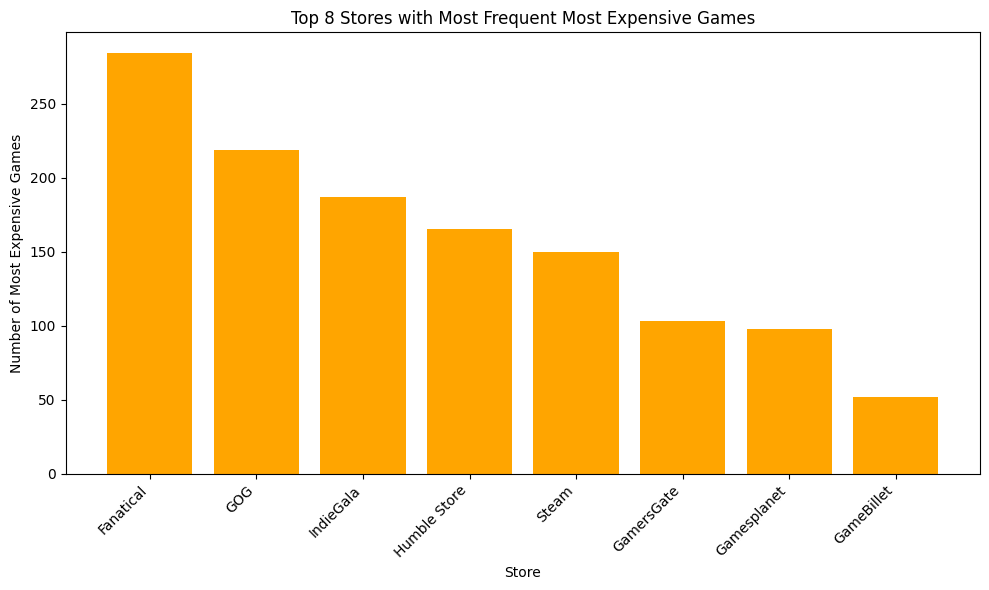

In [70]:
# Find the most expensive salePrice for each game
most_expensive_stores = new_df.loc[new_df.groupby('gameID')['salePrice'].idxmax()]

# Get the top 8 most frequent storeIDs for the most expensive games
top_8_expensive_stores = most_expensive_stores['storeID'].value_counts().nlargest(8)

# Rename storeIDs
top_8_expensive_stores.index = top_8_expensive_stores.index.map(store_names)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_8_expensive_stores.index, top_8_expensive_stores.values, color='orange')  # Use a different color for differentiation
plt.title('Top 8 Stores with Most Frequent Most Expensive Games')
plt.xlabel('Store')
plt.ylabel('Number of Most Expensive Games')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**Findings:**

By analyzing data from the CheapShark API, the cheapest sale prices for each game were identified along with the corresponding store IDs. The results highlighted the top eight stores that most frequently provided the lowest prices for games. The bar graph clearly illustrates that certain stores dominate in offering cheaper games, confirming the hypothesis that price variability exists among different retailers. This pattern indicates that consumers may benefit from comparing prices across stores to find the best deals on games. Surprisingly, the stores selling certain games at higher prices than others continues in a similar ranking, meaning that the stores who sell games cheap are also demanding higher prices than other stores for certain games.